# Day 5 

q.

1. Replace the null values with mean data.


In [1]:
import numpy as np
import pandas as pd

In [2]:
data = {'Company' : ['Amazon', 'IBM', 'CTS', 'Amazon', 'TCS', 'IBM', 'TCS', 'Amazon','CTS'], 
            'Person' : ['Priyanka', 'Punit', 'Rashmi', 'Anupam', 'Mayank', 'Prerna', 'Prerak', 'Rohit', 'Neha'] ,
            'Sales' : [2000, 800, 900, 700, 1200, 1000, 600, 1600, 1000]}
comp_data = pd.DataFrame(data)
comp_data

,Company,Person,Sales
0,Amazon,Priyanka,2000
1,IBM,Punit,800
2,CTS,Rashmi,900
3,Amazon,Anupam,700
4,TCS,Mayank,1200
5,IBM,Prerna,1000
6,TCS,Prerak,600
7,Amazon,Rohit,1600
8,CTS,Neha,1000


In [3]:
comp_data = comp_data.append(pd.DataFrame({'Company':['Mircosoft'], 'Person':['Aniket'], 'Sales':[None]}))

In [4]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)
imputer = imputer.fit(comp_data.iloc[:,2:3])
comp_data.iloc[:,2:3] = imputer.transform(comp_data.iloc[:,2:3])

In [5]:
comp_data

,Company,Person,Sales
0,Amazon,Priyanka,2000
1,IBM,Punit,800
2,CTS,Rashmi,900
3,Amazon,Anupam,700
4,TCS,Mayank,1200
5,IBM,Prerna,1000
6,TCS,Prerak,600
7,Amazon,Rohit,1600
8,CTS,Neha,1000
0,Mircosoft,Aniket,1088.89


# Day 8

# Linear Regression

In [6]:
from sklearn.datasets import load_boston
from sklearn import cross_validation

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
boston = load_boston()

In [8]:
print(boston.keys())
print(boston.DESCR)
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,0

In [9]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
bos['Price'] = boston.target

In [11]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

<IPython.core.display.Javascript object>


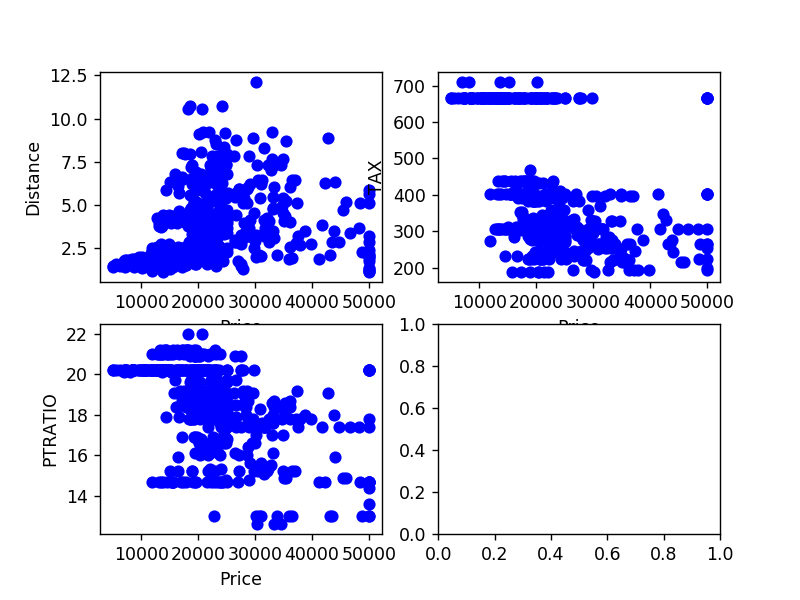

<IPython.core.display.Javascript object>


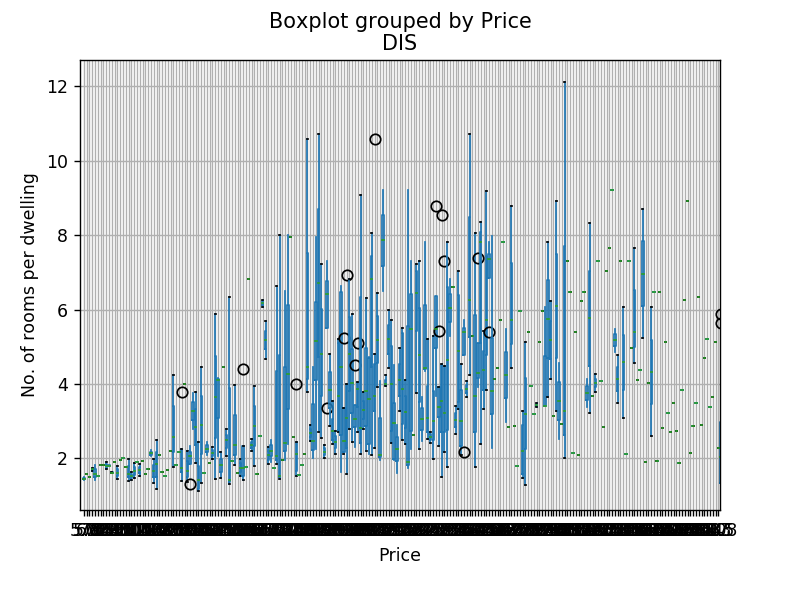

Text(0,0.5,'No. of rooms per dwelling')

In [49]:
from matplotlib import pyplot as plt

%matplotlib notebook

plt.subplot(2,2,1)
plt.scatter(bos['Price']*1000, bos['DIS'], color = 'blue')
plt.xlabel('Price')
plt.ylabel('Distance')

plt.subplot(2,2,2)
plt.scatter(bos['Price']*1000, bos['TAX'], color = 'blue')
plt.xlabel('Price')
plt.ylabel('TAX')

plt.subplot(2,2,3)
plt.scatter(bos['Price']*1000, bos['PTRATIO'], color = 'blue')
plt.xlabel('Price')
plt.ylabel('PTRATIO')

plt.subplot(2,2,4)
bos.boxplot(by= 'Price', column='DIS')
plt.xlabel('Price')
plt.ylabel('No. of rooms per dwelling')

In [13]:
X = bos.drop('Price',axis = 1)

In [14]:
Y = bos['Price']

In [15]:
Y.columns = ['Price']

In [16]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size = 0.25, random_state = 3)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr_model = LinearRegression().fit(X_train, Y_train)

In [19]:
Y_pred = lr_model.predict(X_test)

In [20]:
from matplotlib import pyplot as plt

Text(0.5,0,'TAX')

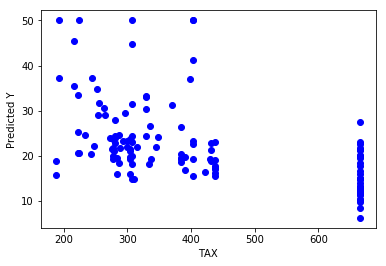

In [35]:
plt.scatter(X_test['TAX'], Y_test, color = 'blue')
plt.ylabel('Predicted Y')
plt.xlabel('TAX')

In [22]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(Y_test, Y_pred))

print(lr_model.score(X_test, Y_test))

18.909710599979224
0.7667235512076709


In [23]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [24]:
import statsmodels.formula.api as sm

X_opt = np.append(arr = np.ones((len(X_train),1)).astype(int), values = X_train, axis = 1)
regressor_OLS = sm.OLS(endog = Y_train, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     75.17
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           1.14e-94
Time:                        10:49:26   Log-Likelihood:                -1134.1
No. Observations:                 379   AIC:                             2296.
Df Residuals:                     365   BIC:                             2351.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3832      6.196      5.872      0.000      24.200      48.567
x1            -0.1259      0.037     -3.411      0.001      -0.199      -0.053
x2             0.0510      0.017      3.031      0.003       0.018       0.084
x3            -0.0329      0.074     -0.446      0.656      -0.178       0.112
x4             3.3281      1.034      3.218      0.001       1.294       5.362
x5           -15.8166      4.587     -3.448      0.001     -24.837      -6.796
x6             3.3521      0.508      6.593      0.000       2.352       4.352
x7             0.0061      0.016      0.377      0.706      -0.026       0.038
x8            -1.3053      0.235     -5.556      0.000      -1.767      -0.843
x9             0.3231      0.078      4.119      0.000       0.169       0.477
x10           -0.0106      0.004     -2.385      0.018      -0.019      -0.002
x11           -0.9510      0.160     -5.959      0.000      -1.265      -0.637
x12            0.0107      0.003      3.341      0.001       0.004       0.017
x13           -0.5207      0.062     -8.425      0.000      -0.642      -0.399
==============================================================================
Omnibus:                      134.005   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.320
Skew:                           1.482   Prob(JB):                    2.16e-127
Kurtosis:                       8.306   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
X_opt = X_opt[:, [0,1,2,4,5,6,7,8,9,10,11,12,13]]


In [26]:
regressor_OLS = sm.OLS(endog = Y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     81.60
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           1.36e-95
Time:                        10:49:26   Log-Likelihood:                -1134.2
No. Observations:                 379   AIC:                             2294.
Df Residuals:                     366   BIC:                             2346.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.5199      6.181      5.908      0.000      24.365      48.675
x1            -0.1253      0.037     -3.401      0.001      -0.198      -0.053
x2             0.0520      0.017      3.126      0.002       0.019       0.085
x3             3.2671      1.024      3.191      0.002       1.254       5.281
x4           -16.3553      4.420     -3.700      0.000     -25.048      -7.663
x5             3.3760      0.505      6.684      0.000       2.383       4.369
x6             0.0064      0.016      0.398      0.691      -0.025       0.038
x7            -1.2854      0.230     -5.579      0.000      -1.739      -0.832
x8             0.3334      0.075      4.450      0.000       0.186       0.481
x9            -0.0115      0.004     -2.962      0.003      -0.019      -0.004
x10           -0.9598      0.158     -6.067      0.000      -1.271      -0.649
x11            0.0107      0.003      3.361      0.001       0.004       0.017
x12           -0.5229      0.062     -8.495      0.000      -0.644      -0.402
==============================================================================
Omnibus:                      134.024   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.043
Skew:                           1.483   Prob(JB):                    4.08e-127
Kurtosis:                       8.297   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
X_opt = X_opt[:, [0,1,2,3,4,5,7,8,9,10,11,12]]
regressor_OLS = sm.OLS(endog = Y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     89.21
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           1.52e-96
Time:                        10:49:26   Log-Likelihood:                -1134.3
No. Observations:                 379   AIC:                             2293.
Df Residuals:                     367   BIC:                             2340.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3088      6.151      5.903      0.000      24.213      48.405
x1            -0.1255      0.037     -3.409      0.001      -0.198      -0.053
x2             0.0511      0.016      3.105      0.002       0.019       0.084
x3             3.2826      1.022      3.212      0.001       1.273       5.292
x4           -15.8651      4.240     -3.742      0.000     -24.203      -7.527
x5             3.4180      0.493      6.928      0.000       2.448       4.388
x6            -1.3129      0.220     -5.979      0.000      -1.745      -0.881
x7             0.3315      0.075      4.439      0.000       0.185       0.478
x8            -0.0115      0.004     -2.962      0.003      -0.019      -0.004
x9            -0.9552      0.158     -6.061      0.000      -1.265      -0.645
x10            0.0108      0.003      3.412      0.001       0.005       0.017
x11           -0.5140      0.057     -8.968      0.000      -0.627      -0.401
==============================================================================
Omnibus:                      136.508   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.815
Skew:                           1.505   Prob(JB):                    1.03e-132
Kurtosis:                       8.425   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
X_train = X_train.drop(['INDUS','AGE'],axis = 1)
X_test = X_test.drop(['INDUS','AGE'],axis = 1)

In [29]:
lr_model = LinearRegression().fit(X_train, Y_train)
Y_pred = lr_model.predict(X_test)

In [30]:
print(mean_squared_error(Y_test, Y_pred))

18.67874043482706


In [31]:
lr_model.score(X_test, Y_test)

0.7695728756126533